In [9]:
import numpy as np
from scipy import linalg as la
from os import walk
from random import sample
from scipy.ndimage import imread
from matplotlib import pyplot as plt

%matplotlib inline

### Plotter
We desire to be able to see the image we load and hence build a function that prints them.



In [10]:
def plot(img, w=200, h=180):
    """Helper function for plotting flattened images."""
    plt.imshow(img.reshape((w,h)),cmap="gray")
    plt.show()

### Loader
We load the faces into a variable that pulls the pictures from our source file.



In [11]:
# Problem 1
def getFaces(path="./faces94"):
    """Traverse the directory specified by 'path' and return an array containing one column vector per subdirectory.
    For the faces94 dataset, this gives an array with just one column for each face in the dataset.
    Each column corresponds to a flattened grayscale image.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for f in filenames:
            if f[-3:]=="jpg":          # only get jpg images
                 # Load the image, convert it to grayscale, and flatten it into vector.
                faces.append(imread(dirpath+"/"+f).mean(axis=2).ravel())
                break
    # Put all face vectors column-wise into a matrix.
    return np.transpose(faces)

### Test loader and plotter
We begin with a single picture and proceed to test several of the files.

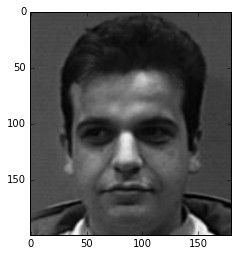

In [12]:
fotos = getFaces()
plot(fotos[:,152])

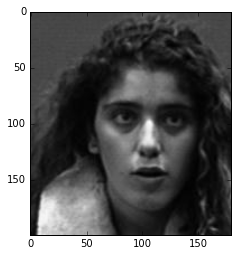

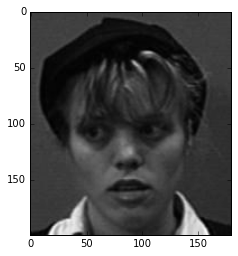

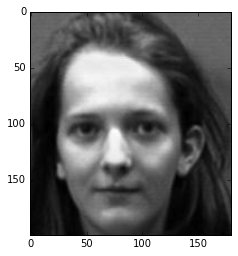

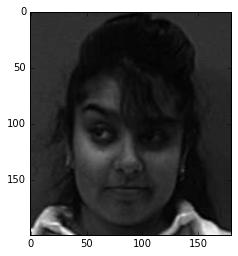

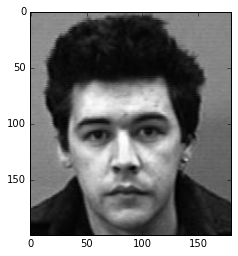

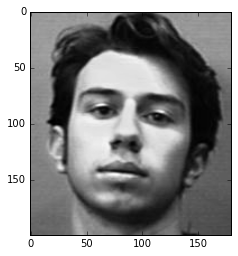

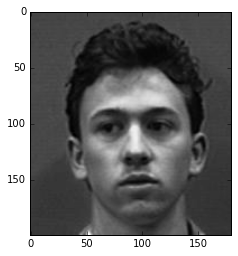

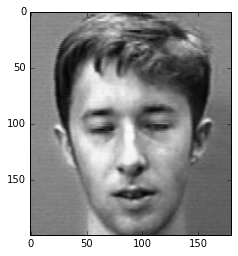

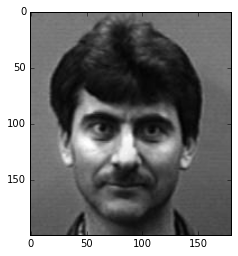

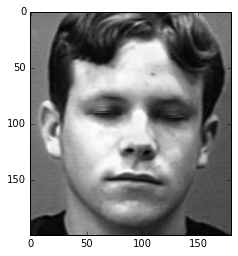

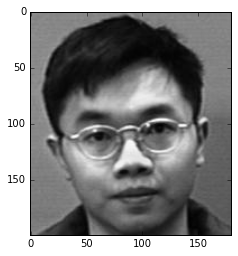

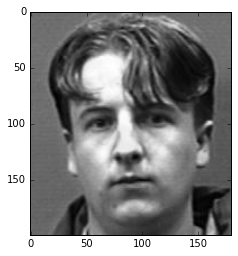

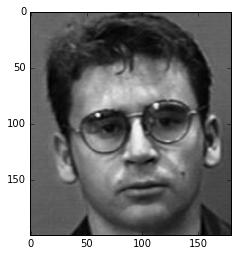

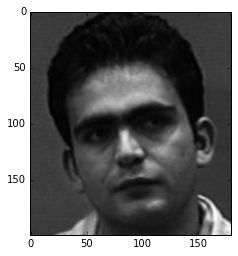

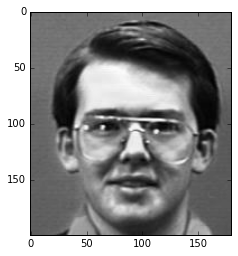

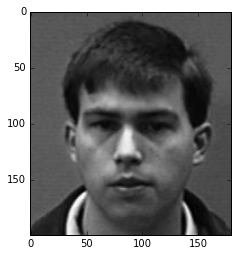

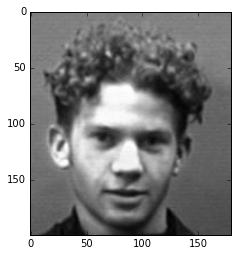

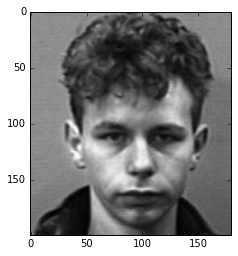

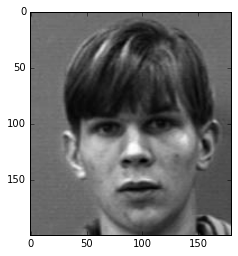

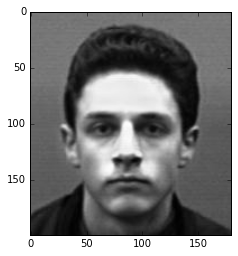

In [13]:
for i in xrange(1,100,5):
    plot(fotos[:,i])

### Facial Recognition Class

We create a class in order to be able to find the closest image in our set to an input image. We find the average features for a face and proceed to test each section.

In [14]:
# Problems 2, 3, 4, 5
class FacialRec:
    """
    Attributes:
        F
        mu
        Fbar
        U
    """
    def __init__(self,path="./faces94"):
        self.initFaces(path)
        self.initMeanImage()
        self.initDifferences()
        self.initEigenfaces()
    def initFaces(self, path):
        self.F = getFaces()
    def initMeanImage(self):
        k = float(self.F.shape[1])
        self.mu = np.average(self.F, axis=1)
    def initDifferences(self):
        self.Fbar = (self.F.T - self.mu.T).T
    def initEigenfaces(self):
        self.U= la.svd(self.Fbar, full_matrices=False)[0]
        
    def project(self, A, s=19):
        return np.dot(self.U[:,:s].T,A)
    
    # Problem 6
    def findNearest(self, image, s=38):
        """Project Fbar, producing a matrix whose columns are f-hat"""
        Fhat = self.project(self.Fbar,s)
        """Shift 'image' by the mean and project, producing g-hat"""
        ghat = self.project((image - self.mu),s)
        """For both Fhat and ghat, use your project function from the previous problem.
        Return the index that minimizes ||fhat_i - ghat||_2."""
        dif = Fhat.T-ghat.T
        cstor = la.norm(dif, ord = 2, axis=1)
        i = np.argmin(cstor)
        return self.F[:,i]

Initialize the files.

In [15]:
esto = FacialRec()

## Different functions

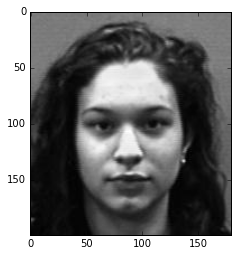

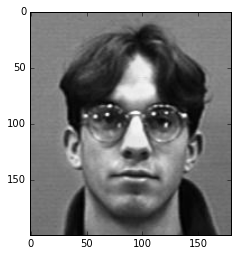

In [16]:
plot(esto.F[:,15])
plot(esto.F[:,67])

### Find the average facial features

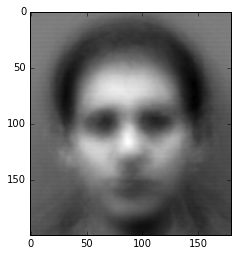

In [17]:
plot(esto.mu)

### Difference between a specific face and the mean

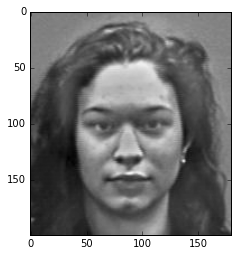

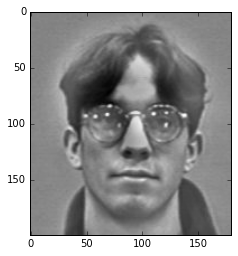

In [18]:
plot(esto.Fbar[:,15])
plot(esto.Fbar[:,67])

### Face by eigendecomposition

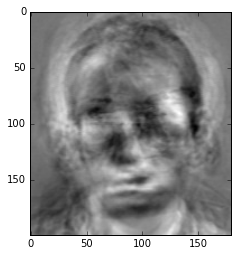

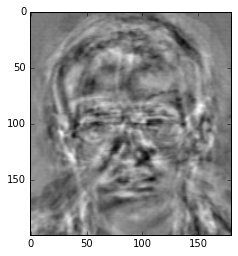

In [19]:
plot(esto.U[:,15])
plot(esto.U[:,67])

### Facial reduction by truncating our approximation

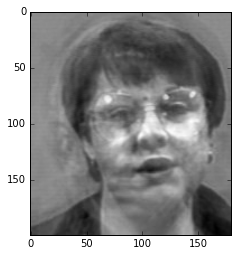

In [20]:
otro = esto.project(esto.Fbar[:,0])
otros = np.dot(esto.U[:,:19],otro)
plusmean = otros + esto.mu
plot(plusmean)


## Using "Find Nearest" function
We find the nearest function to the average facial features and compare it visually.

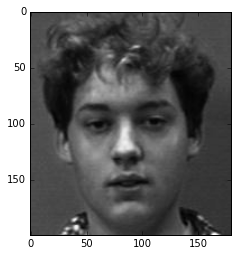

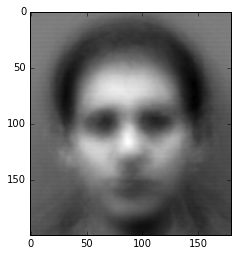

In [23]:
plot(esto.findNearest(esto.mu,s=50))
plot(esto.mu)